# 2.2.4.4 Image Data

Earlier in this module, we introduced image data as a 2d or 3d tensor
representing pixel values.

Commonly, we may wish to resize, reshape, normalise or standardise image
data.

Normalisation vs Standardisation *Normalisation* will typically rescale the values into a range of [0,1]. *Standardisation* will typically rescale data to have a mean of 0 and a standard deviation of 1 (unit variance).`

## Resizing (and Resampling)

Resizing vs Resampling The term *resize* can be used
to refer to changing the physical size of an image without changing the
number of pixels. In these contexts, *resampling* is used to refer to
the operation that changes the total number of pixels.

However, many popular Python image libraries use the term *resize* to
refer to changing the total number of pixels. We will follow this
convention.


When resizing, interpolation methods determine pixel values when upsampling or downsampling an image. In the case of
    upsampling, the method determines the value for "new" pixels. 
    
### OpenCV Interpolation
The OpenCV docs provide some info on [resizing](https://docs.opencv.org/2.4.13.7/modules/imgproc/doc/geometric_transformations.html#resize), with brief mention of interpolation methods.
A friendly explanation of the interpolation methods available is given in [this article](https://www.pyimagesearch.com/2021/01/20/opencv-resize-image-cv2-resize/) under the "Comparing OpenCV interpolation methods" heading.

For example, using the OpenCV library:


loaded data of shape:(16, 16, 3)


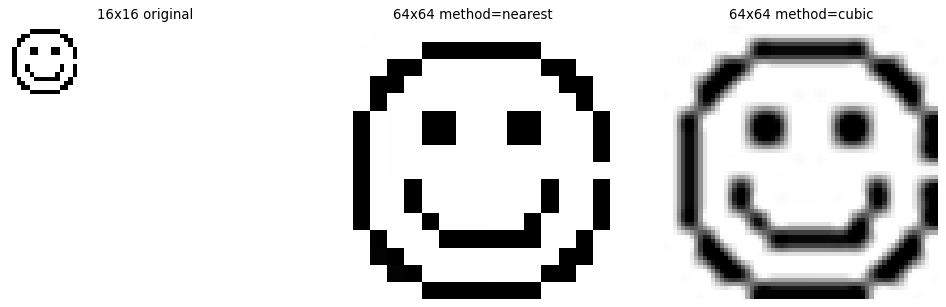

In [1]:

import cv2 
from matplotlib import pyplot as plt

im = cv2.imread("./data/smiley_16.png") 
print(f"loaded data of shape:{im.shape}")

# resize using NEAREST interpolation method

im_64_nearest = cv2.resize(im, (64,64), interpolation=cv2.INTER_NEAREST)

# resize using CUBIC interpolation method

im_64_cubic = cv2.resize(im, (64,64), interpolation=cv2.INTER_CUBIC)



# display with matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), dpi=80, sharex=True, sharey=True,)
ax[0].imshow(im, cmap='gray')
ax[0].set_title("16x16 original")
ax[0].axis('off')

ax[1].imshow(im_64_nearest)
ax[1].set_title("64x64 method=nearest")
ax[1].axis('off')

ax[2].imshow(im_64_cubic)
ax[2].set_title("64x64 method=cubic")
ax[2].axis('off')

plt.show()



## Standardisation

Image processing will often expect the data to be standardised.

As we’ve seen that our image data is represented in a numeric 2d or 3d
tensor, we can standardise by converting the image to have zero mean,
and unit variance.


means: [[[ 43.88558043  72.84690265 187.30281104]]]
stds: [[[34.91541538 48.4553325  52.90432839]]]



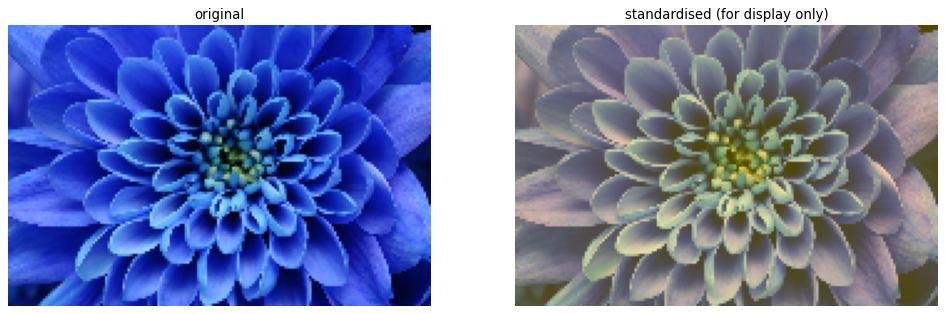

In [2]:
import cv2 
from matplotlib import pyplot as plt
import numpy as np

im = cv2.imread("data/flower.png") # convert colour as we’re loading in BGR rather than RGB 
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

means = np.mean(im, axis=(0,1), keepdims=True) 
stds = np.std(im,
axis=(0,1), keepdims=True)

print(f"means: {means}")
print(f"stds: {stds}") 
print()

# subtract means and divide by stds

result = (im - means) / stds


# continue from last
# display with matplotlib
# scale range to [0,255] for display 
for_vis = cv2.normalize(result, None, 0, 255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U) 

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), dpi=80, sharex=True, sharey=True,)
ax[0].imshow(im, cmap='gray')
ax[0].set_title("original")
ax[0].axis('off')

ax[1].imshow(for_vis)
ax[1].set_title("standardised (for display only)")
ax[1].axis('off')

plt.show()



Some sanity checks (code and output) for standardisation hidden below.


In [3]:
### sanity checks

# check new means and stds

means, stds = cv2.meanStdDev(result)

# check our new means are 0 (within given tolerance)

np.testing.assert_allclose(means, 0, atol=1e-07) # check our new stds are 1 (within given tolerance) 
np.testing.assert_allclose(stds, 1)

# show top left "pixel"

print(f"original top left: {im[0, 0, :]}") 
print(f"standardised top left: {result[0, 0, :]}")
print()

original top left: [ 78 127 249]
standardised top left: [0.97705896 1.11758798 1.16620305]



However, for many deep learning tasks, it is common to standardise image data by using precomputed dataset means and standard deviations,
rather than calculate these for each image. For example, using the ImageNet values:

[-0.78217308  0.1876752   2.53542511]


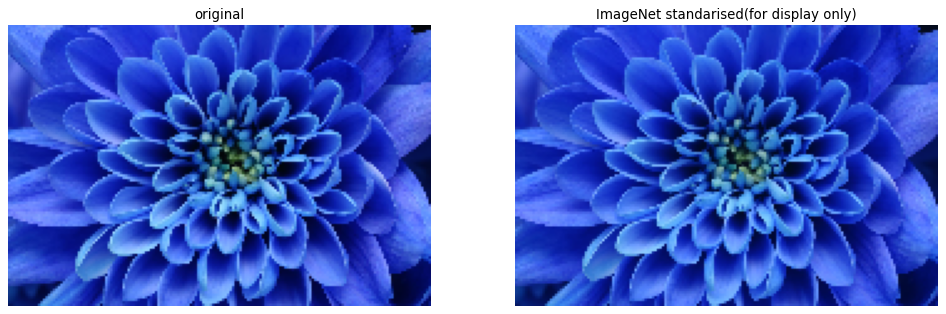

In [4]:

import cv2

im = cv2.imread("data/flower.png")
# convert colour as we're loading in BGR rather than RGB
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

imagenet_means = [0.485, 0.456, 0.406],
imagenet_stds = [0.229, 0.224, 0.225]

# assumes we're in range [0,1] rather than [0,255]
scaled = cv2.normalize(im, None, 0, 1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

# subtract means and divide by stds
imagenet_result = (scaled - imagenet_means) / imagenet_stds
print(imagenet_result[0,0,:])


# continue from last

# display with matplotlib

# scale range to \[0,255\] for display

imagenet_for_vis = cv2.normalize(imagenet_result, None, 0, 255,
norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5), dpi=80,
sharex=True, sharey=True,)
ax[0].imshow(im, cmap='gray')
ax[0].set_title("original") 
ax[0].axis('off')

ax[1].imshow(imagenet_for_vis) 
ax[1].set_title("ImageNet standarised(for display only)") 
ax[1].axis('off')

plt.show()


We see that the image doesn’t appear to have been altered to the same
extent as before. This is due to the ImageNet values being less skewed
towards the blue channel.

note: many packages like
[torchvision](https://pytorch.org/vision/stable/) will have convenience
methods to do standardisation/normalisation for you.